# Assignment 1: Building a Better Contact Sheet

In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

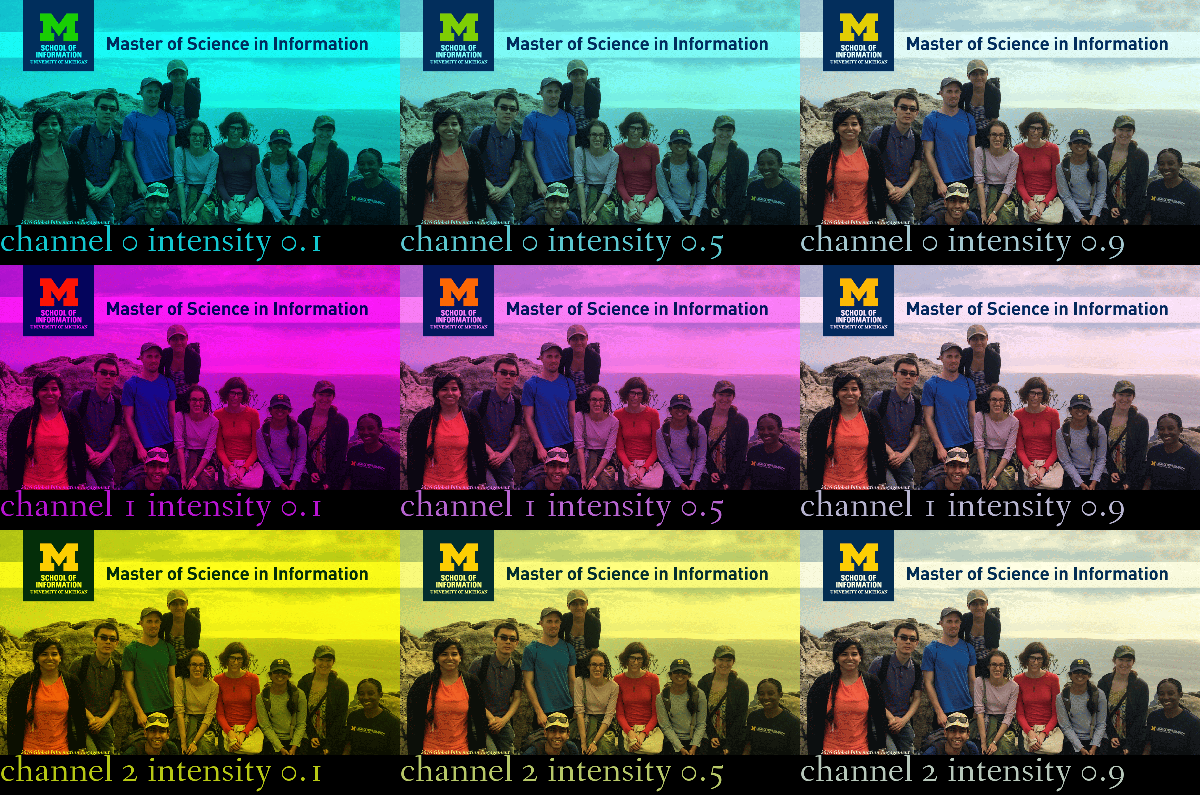

In [ ]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance

# read image and convert to RGB
image = Image.open("readonly/msi_recruitment.gif").convert('RGB')

# set the font
font = ImageFont.truetype("readonly/fanwood-webfont.ttf", size=75)

# split the image into red, green, and blue channels
red, green, blue = image.split()

# initialize lists to store enhanced images, tones, and prompts
enhanced_images = []
tones = []
prompts = []

# set the values for enhancing the color channels
values = [0.1, 0.5, 0.9]
channel = 0

# Enhance red color channel
enhancer = ImageEnhance.Brightness(red)
for value in values:
    enhanced_red = enhancer.enhance(value)
    prompt = "channel {} intensity {}".format(channel, value)
    prompts.append(prompt)
    new_image = Image.merge("RGB", (enhanced_red, green, blue))
    tone_rgb = tuple(new_image.getpixel((0, 0)))
    tones.append(tone_rgb)
    enhanced_images.append(new_image)
channel += 1

# Enhance green color channel
enhancer = ImageEnhance.Brightness(green)
for value in values:
    enhanced_green = enhancer.enhance(value)
    prompt = "channel {} intensity {}".format(channel, value)
    prompts.append(prompt)
    new_image = Image.merge("RGB", (red, enhanced_green, blue))
    tone_rgb = tuple(new_image.getpixel((0, 0)))
    tones.append(tone_rgb)
    enhanced_images.append(new_image)
channel += 1

# Enhance blue color channel
enhancer = ImageEnhance.Brightness(blue)
for value in values:
    enhanced_blue = enhancer.enhance(value)
    prompt = "channel {} intensity {}".format(channel, value)
    prompts.append(prompt)
    new_image = Image.merge("RGB", (red, green, enhanced_blue))
    tone_rgb = tuple(new_image.getpixel((0, 0)))
    tones.append(tone_rgb)
    enhanced_images.append(new_image)

# create a contact sheet to display the enhanced images
first_image = enhanced_images[0]
contact_sheet = Image.new(first_image.mode, (first_image.width*3, first_image.height*3+240))
draw = ImageDraw.Draw(contact_sheet)
i = 0
x = 0
y = 0

for img in enhanced_images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y))
    
    # Add prompt text with the corresponding tone and font
    draw.text((x, y+first_image.height), prompts[i], fill=tones[i], font=font)
    
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x = 0
        y = y+first_image.height+80
    else:
        x = x+first_image.width
    i += 1

# Resize the contact sheet and save it
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2), int(contact_sheet.height/2)))
contact_sheet.save("assignment_1.jpg")

# Display the contact sheet
display(contact_sheet)
